In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import itertools
import pgeocode
import plotly.express as px

sns.set(rc={'figure.figsize':(20,10)})

## Collect initial data
The data was collected from MovieLens and IMDB public datasets, containing information about the movies (countries, average ratings, titles, etc.) and user ratings - which rating user assigned to movie.

In [2]:
mapping_df = pd.read_csv("../data/movielens_to_imdb_mapping.csv").dropna()
title_to_imdb_id = {title: imdb_id for _, title, imdb_id in mapping_df.itertuples()}
imdb_id_to_title = {imdb_id: title for title, imdb_id in title_to_imdb_id.items()}

## Describe data

Obtained data from MovieLens dataset consist of:
- 3883 distinct movies
- 6040 distinct users
- 1000209 ratings of movies

IMDB dataset consists of following features:
- 16342 distinct movies
- information about 14548 distinct persons that related to movie

## Explore data
Graphics and other visualization tools can be find below and in our tableau report: [tableau.com](https://public.tableau.com/app/profile/lada.morozova8590/viz/DataMiningProject_16512340731190/Story1).

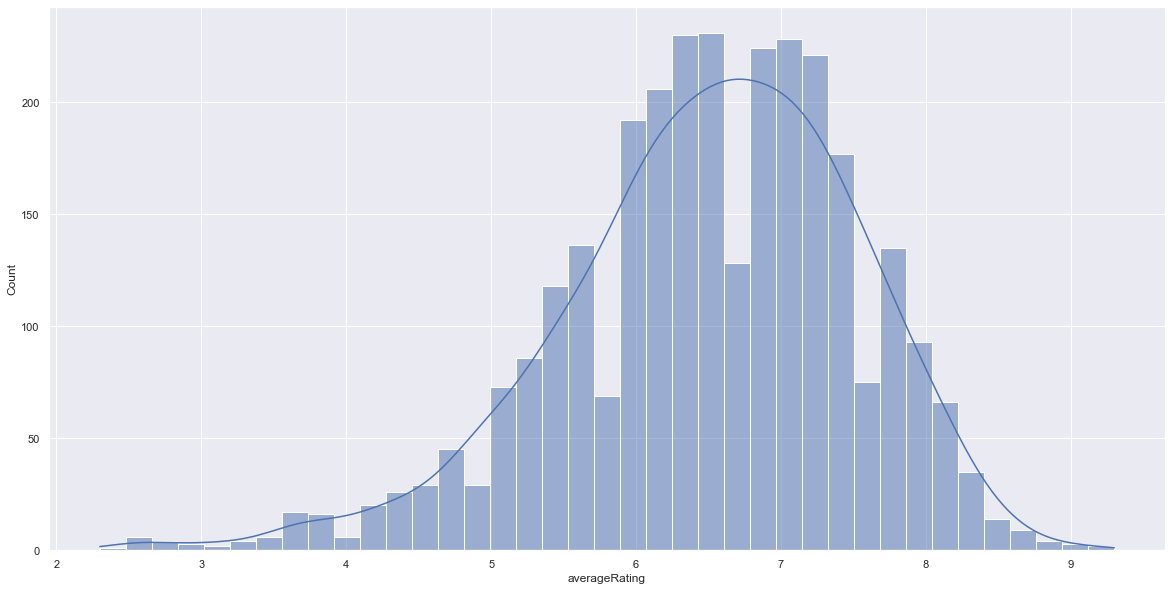

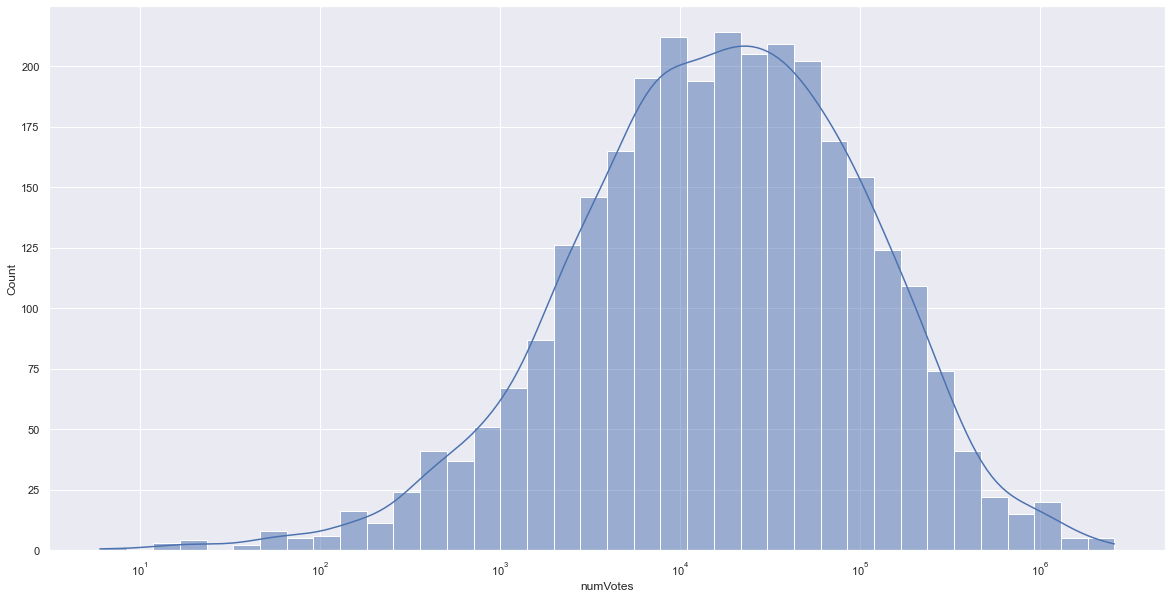

In [3]:
# Firms country distribution
title_ratings = pd.read_csv(
    "../data/imdb/title.ratings.tsv", sep="\t", low_memory=False
)
title_ratings = title_ratings[title_ratings.tconst.isin(imdb_id_to_title)]
title_ratings = title_ratings.sort_values(by="averageRating", ascending=False)
sns.histplot(title_ratings.averageRating, kde=True)
plt.show()

sns.histplot(
    title_ratings.sort_values(by="numVotes").numVotes, kde=True, log_scale=True
)
plt.show()

In [4]:
print("Top ten films with highest average ratings:")
for _, row in title_ratings[:10].iterrows():
    print(
        f"Film: {imdb_id_to_title[row.tconst]}, average rating: {row.averageRating} , count votes: {row.numVotes}"
    )

print("-" * 50)
print("Top ten films with lowest average ratings:")
for _, row in title_ratings.sort_values(by="averageRating")[:10].iterrows():
    print(
        f"Film: {imdb_id_to_title[row.tconst]}, average rating: {row.averageRating} , count votes: {row.numVotes}"
    )

Top ten films with highest average ratings:
Film: Shawshank Redemption, The (1994), average rating: 9.3 , count votes: 2582509
Film: Godfather, The (1972), average rating: 9.2 , count votes: 1778065
Film: Schindler's List (1993), average rating: 9.0 , count votes: 1314667
Film: Godfather: Part II, The (1974), average rating: 9.0 , count votes: 1228930
Film: 12 Angry Men (1957), average rating: 9.0 , count votes: 762710
Film: Pulp Fiction (1994), average rating: 8.9 , count votes: 1981028
Film: Room with a View, A (1986), average rating: 8.8 , count votes: 35
Film: Fight Club (1999), average rating: 8.8 , count votes: 2032733
Film: Forrest Gump (1994), average rating: 8.8 , count votes: 1992282
Film: One Flew Over the Cuckoo's Nest (1975), average rating: 8.7 , count votes: 982211
--------------------------------------------------
Top ten films with lowest average ratings:
Film: Theodore Rex (1995), average rating: 2.3 , count votes: 4548
Film: Baby Geniuses (1999), average rating: 2.5 

In [5]:
print("Top frequent voted films - approx. same list of films as in top ratings films")
for _, row in title_ratings.sort_values(by='numVotes',ascending=False)[:10].iterrows():
    print(f"Film: {imdb_id_to_title[row.tconst]}, average rating: {row.averageRating} , count votes: {row.numVotes}")

print("-" * 20)
print("Top least voted films")
for _, row in title_ratings.sort_values(by='numVotes',ascending=True)[:10].iterrows():
    print(f"Film: {imdb_id_to_title[row.tconst]}, average rating: {row.averageRating} , count votes: {row.numVotes}")


Top frequent voted films - approx. same list of films as in top ratings films
Film: Shawshank Redemption, The (1994), average rating: 9.3 , count votes: 2582509
Film: Fight Club (1999), average rating: 8.8 , count votes: 2032733
Film: Forrest Gump (1994), average rating: 8.8 , count votes: 1992282
Film: Pulp Fiction (1994), average rating: 8.9 , count votes: 1981028
Film: Matrix, The (1999), average rating: 8.7 , count votes: 1856489
Film: Godfather, The (1972), average rating: 9.2 , count votes: 1778065
Film: Gladiator (2000), average rating: 8.5 , count votes: 1452092
Film: Silence of the Lambs, The (1991), average rating: 8.6 , count votes: 1383457
Film: Saving Private Ryan (1998), average rating: 8.6 , count votes: 1344800
Film: Schindler's List (1993), average rating: 9.0 , count votes: 1314667
--------------------
Top least voted films
Film: Kidnapped (1960), average rating: 7.0 , count votes: 6
Film: Stranger, The (1994), average rating: 7.5 , count votes: 12
Film: Artemisia (19

In [6]:
title_basics = pd.read_csv("../data/imdb/title.basics.tsv", sep="\t", low_memory=False)
title_basics = title_basics[title_basics.tconst.isin(imdb_id_to_title)]
title_basics.head(20)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
10279,tt0010418,movie,Male and Female,Male and Female,0,1919,\N,116,"Adventure,Drama"
12174,tt0012349,movie,The Kid,The Kid,0,1921,\N,68,"Comedy,Drama,Family"
15456,tt0015693,movie,Cobra,Cobra,0,1925,\N,70,"Drama,Romance"
15625,tt0015863,movie,Go West,Go West,0,1925,\N,69,"Comedy,Western"
15626,tt0015864,movie,The Gold Rush,The Gold Rush,0,1925,\N,95,"Adventure,Comedy,Drama"
16086,tt0016332,movie,Seven Chances,Seven Chances,0,1925,\N,56,"Comedy,Romance"
16381,tt0016630,movie,Battling Butler,Battling Butler,0,1926,\N,77,"Comedy,Sport"
16391,tt0016640,movie,The Bells,The Bells,0,1926,\N,68,"Crime,Drama,Horror"
17098,tt0017350,movie,The Scarlet Letter,The Scarlet Letter,0,1926,\N,115,Drama
17163,tt0017416,movie,The Son of the Sheik,The Son of the Sheik,0,1926,\N,68,"Adventure,Drama,Romance"


# Unique genres: 26
IMDB genres: ['Action' 'Adventure' 'Animation' 'Biography' 'Comedy' 'Crime'
 'Documentary' 'Drama' 'Family' 'Fantasy' 'Film-Noir' 'History' 'Horror'
 'Music' 'Musical' 'Mystery' 'News' 'Reality-TV' 'Romance' 'Sci-Fi'
 'Short' 'Sport' 'Thriller' 'War' 'Western' '\\N']


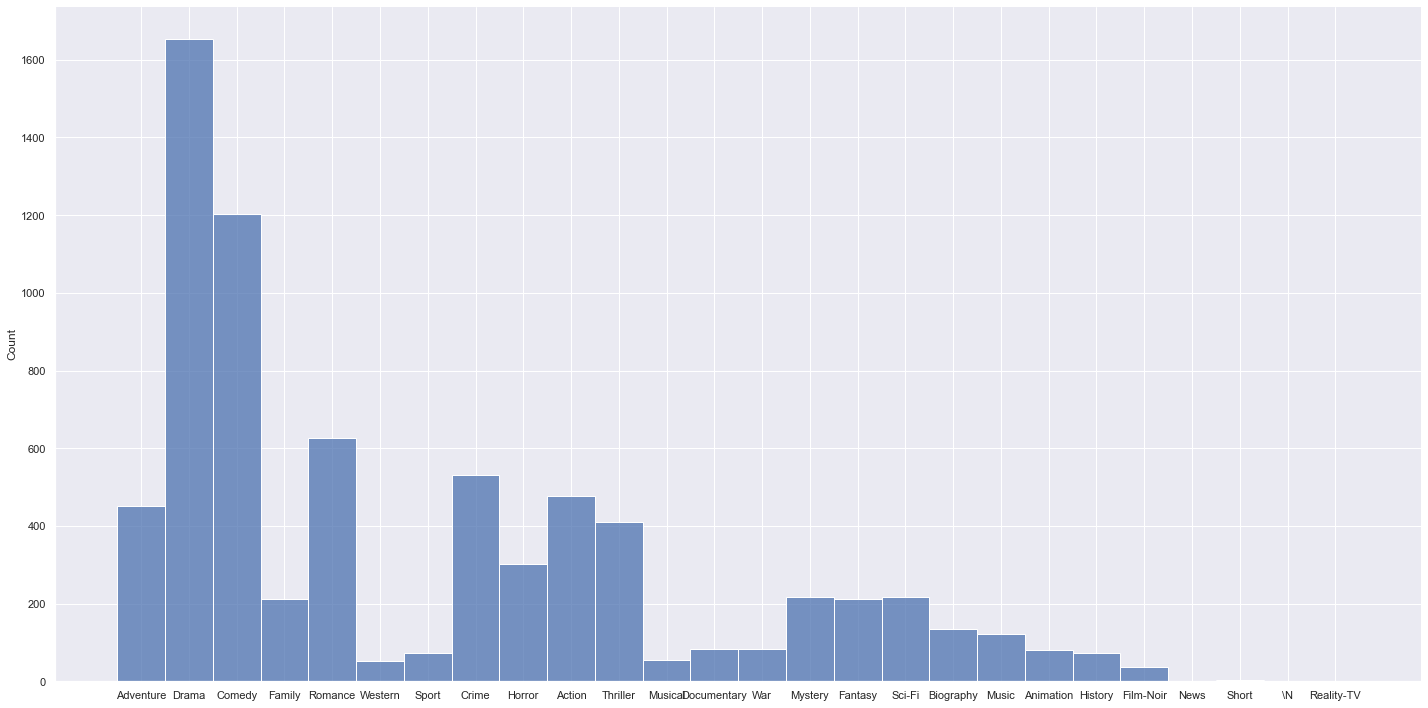

In [7]:
genres = list(itertools.chain(*[line.split(",") for line in title_basics.genres]))
print(f"# Unique genres: {len(np.unique(genres))}")
print(f"IMDB genres: {np.unique(genres)}")
sns.displot(x=genres, height=10, aspect=2)

In [8]:
# User's favorite genres
users_ratings = pd.read_csv("../data/movie_lens/movie_lens_1m.csv")
movielens_genres = list(
    itertools.chain(*[line.split("|") for line in users_ratings.Genres])
)

print(f"MovieLens genres: {np.unique(movielens_genres)}")

MovieLens genres: ['Action' 'Adventure' 'Animation' "Children's" 'Comedy' 'Crime'
 'Documentary' 'Drama' 'Fantasy' 'Film-Noir' 'Horror' 'Musical' 'Mystery'
 'Romance' 'Sci-Fi' 'Thriller' 'War' 'Western']


In [9]:
print("MovieLens genres have Children's genre, which in IMDB dataset called Adventure")
imdb_none = "\\N"
print(
    f"Also, IMDB dataset introduce additional genres, such as: {set(genres).difference(set(movielens_genres + [imdb_none]))}, which is not present in movielens dataset - possibly we should remove them from imdb dataset"
)

MovieLens genres have Children's genre, which in IMDB dataset called Adventure
Also, IMDB dataset introduce additional genres, such as: {'News', 'Family', 'Reality-TV', 'Biography', 'Music', 'History', 'Short', 'Sport'}, which is not present in movielens dataset - possibly we should remove them from imdb dataset


In [10]:
users_ratings.head(10)

,UserID,MovieID,Rating,Timestamp,Title,Genres,Gender,Age,Occupation,ZipCode
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067
5,1,1197,3,978302268,"Princess Bride, The (1987)",Action|Adventure|Comedy|Romance,F,1,10,48067
6,1,1287,5,978302039,Ben-Hur (1959),Action|Adventure|Drama,F,1,10,48067
7,1,2804,5,978300719,"Christmas Story, A (1983)",Comedy|Drama,F,1,10,48067
8,1,594,4,978302268,Snow White and the Seven Dwarfs (1937),Animation|Children's|Musical,F,1,10,48067
9,1,919,4,978301368,"Wizard of Oz, The (1939)",Adventure|Children's|Drama|Musical,F,1,10,48067


Top genres among all users


<AxesSubplot:ylabel='Genre'>

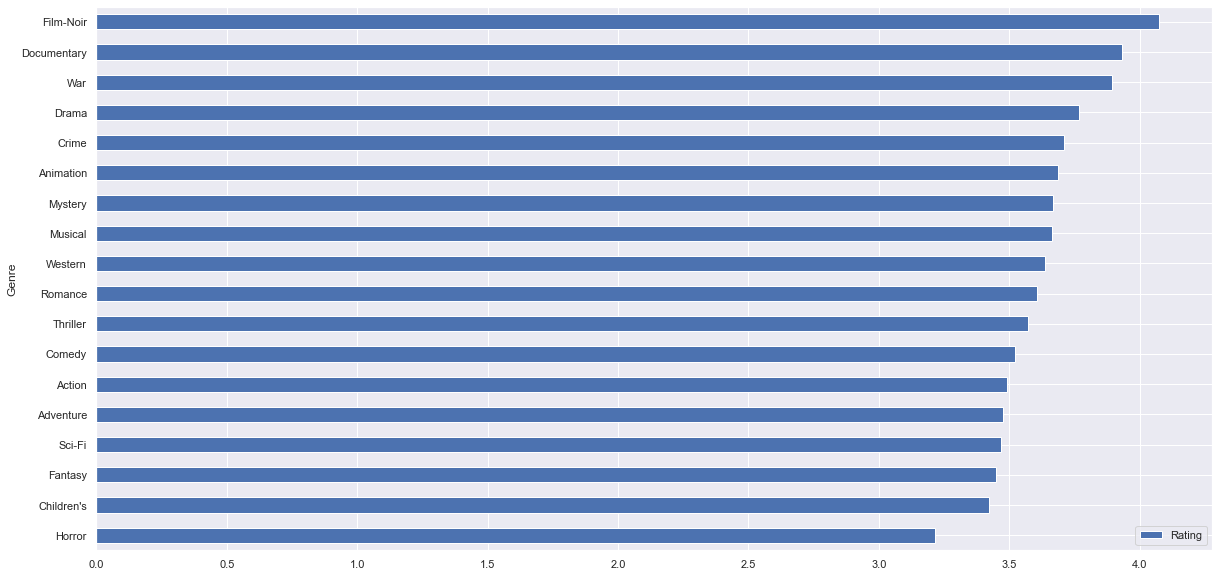

In [11]:
# Top genres among all users

user_genres_rating = []
for row in users_ratings[["UserID", "Rating", "Genres"]].itertuples():
    for genre in row.Genres.split("|"):
        user_genres_rating.append(
            {"UserID": row.UserID, "Rating": row.Rating, "Genre": genre}
        )
user_genres_rating = pd.DataFrame(user_genres_rating)
plot_data = (
    user_genres_rating[["Genre", "Rating"]]
    .groupby("Genre")
    .mean()
    .sort_values(by="Rating")
)
print("Top genres among all users")
plot_data.plot.barh()

In [12]:
## Top-5 favorite genres for each user
print("Top-5 favorite genres for each user\n")
for user_id in np.random.choice(user_genres_rating.UserID.unique(), size=10):
    data = user_genres_rating[user_genres_rating.UserID == user_id][["Genre", "Rating"]]
    data = data.groupby("Genre").mean().sort_values(by="Rating")

    print(f"User: {user_id}, top-5 genres: {data.index[:5].tolist()}")

Top-5 favorite genres for each user

User: 5985, top-5 genres: ['Horror', 'Romance', 'Mystery', 'Drama', 'Sci-Fi']
User: 987, top-5 genres: ['Horror', 'Western', 'Fantasy', 'Musical', 'Action']
User: 4751, top-5 genres: ['Documentary', 'War', 'Western', 'Action', 'Adventure']
User: 87, top-5 genres: ['Animation', "Children's", 'Documentary', 'Musical', 'Comedy']
User: 4836, top-5 genres: ['Horror', "Children's", 'Sci-Fi', 'Animation', 'Action']
User: 3532, top-5 genres: ['Documentary', 'Animation', "Children's", 'Action', 'War']
User: 1601, top-5 genres: ['Fantasy', 'Adventure', 'Animation', 'Sci-Fi', 'Action']
User: 135, top-5 genres: ['Western', 'Horror', 'Thriller', 'Mystery', 'Sci-Fi']
User: 1175, top-5 genres: ['Crime', 'Sci-Fi', 'Thriller', 'Adventure', 'Action']
User: 1163, top-5 genres: ['Drama', 'Sci-Fi', 'Adventure', 'Comedy', 'Crime']


In [13]:
# Plotting map of users

nomi = pgeocode.Nominatim("US")

users = pd.read_csv("../data/movie_lens/movie_lens_1m.csv").drop_duplicates(
    subset=["UserID"]
)[["ZipCode"]]
users["latitude"] = users["ZipCode"].apply(lambda x: nomi.query_postal_code(x)[9])
users["longitude"] = users["ZipCode"].apply(lambda x: nomi.query_postal_code(x)[10])

fig = px.scatter_mapbox(users, lat="latitude", lon="longitude", zoom=3, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.show()

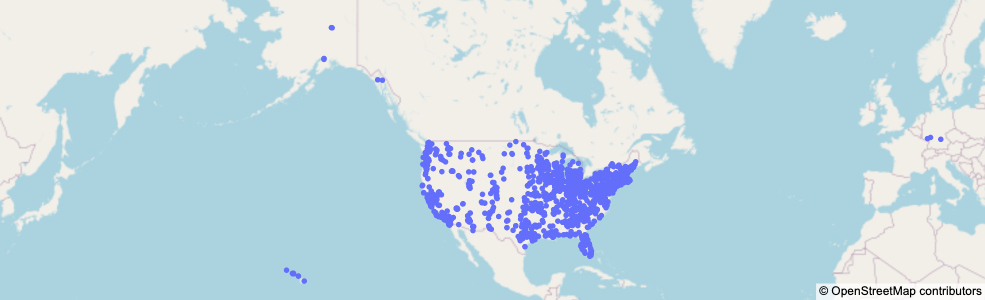

## Verify data quality

- The MovieLens dataset can be considered as skewed toward the USA in terms of users’ records. The following
dataset is gender biased, as the number of male users outweighs the number of female users
- MovieLens dataset contains films released mainly from 1894 till 2000.
- Inconsistency in titles of the movies among IMDB dataset and MovieLens dataset was detected, as well as an inconsistency in genres